In [1]:
from bs4 import BeautifulSoup as bs 
import re 
import requests
mobile_reviews=[]
url1 = "https://www.snapdeal.com/product/lenovo-a7000-8-gbwhite/660909822842/reviews?page="
url2 = "&sortBy=HELPFUL"                             
for i in range(1,60):
    mobile=[]  
    base_url = url1+str(i)+url2
    response = requests.get(base_url)
    soup = bs(response.content,"html.parser")
    temp = soup.findAll("div",attrs={"class","user-review"})
    for j in range(len(temp)):
        mobile.append(temp[j].find("p").text)
    mobile_reviws=mobile_reviews+mobile  
mobile_snapdeal = list(set(mobile_reviws))
print(mobile_snapdeal)

['Happy very quick delivery .responsible and  good lock', 'Same as above', 'Battary very poor capacity', 'Not so much but enough...', "So far it's nice feeling using this mobile. Great performance.\nSlim and easy to access. Comfortable to hanfle.", 'Liked the product smooth and big, no lags.', 'nice product   This is my first android device and I had a thrill in using this device.', 'Very nice phone with  light weight.. nice product by Lenovo. It has little bit network problem but after visiting to Lenovo service center, my problem was resolved. Thanku Lenovo 😊😊', 'Good looking.good batary backup.nice phone.', 'I purchased this for its good quality and stability thank u for the service..']


In [101]:
data=open('snapdeal_reviews.txt','w',encoding='utf-8')
data.write(str(mobile_snapdeal))
data.close()

In [102]:
f=open('snapdeal_reviews.txt','r',encoding='utf-8')
read=f.read()

print(read)

['Happy very quick delivery .responsible and  good lock', 'Same as above', 'Battary very poor capacity', 'Not so much but enough...', "So far it's nice feeling using this mobile. Great performance.\nSlim and easy to access. Comfortable to hanfle.", 'Liked the product smooth and big, no lags.', 'nice product   This is my first android device and I had a thrill in using this device.', 'Very nice phone with  light weight.. nice product by Lenovo. It has little bit network problem but after visiting to Lenovo service center, my problem was resolved. Thanku Lenovo 😊😊', 'Good looking.good batary backup.nice phone.', 'I purchased this for its good quality and stability thank u for the service..']


In [103]:
import pandas as pd
import re
word=re.sub("[^A-Za-z\." "]+",' ',read)
n=word.split('.')
dt=pd.DataFrame({'reviews':n})
print(dt)

                                              reviews
0                          Happy very quick delivery 
1   responsible and good lock Same as above Battar...
2                                                    
3                                                    
4          So far it s nice feeling using this mobile
5                                   Great performance
6                            nSlim and easy to access
7                               Comfortable to hanfle
8            Liked the product smooth and big no lags
9    nice product This is my first android device ...
10                  Very nice phone with light weight
11                                                   
12                             nice product by Lenovo
13   It has little bit network problem but after v...
14                         Thanku Lenovo Good looking
15                                 good batary backup
16                                         nice phone
17   I purchased this for it

In [104]:
l=[]
read=read[1:-1]
s=read.split('.')
for i in s:
    i=i.split()
    for j in i:
        l.append(j)
        

In [105]:
t=' '.join(l)
print(t)

'Happy very quick delivery responsible and good lock', 'Same as above', 'Battary very poor capacity', 'Not so much but enough ', "So far it's nice feeling using this mobile Great performance \nSlim and easy to access Comfortable to hanfle ", 'Liked the product smooth and big, no lags ', 'nice product This is my first android device and I had a thrill in using this device ', 'Very nice phone with light weight nice product by Lenovo It has little bit network problem but after visiting to Lenovo service center, my problem was resolved Thanku Lenovo 😊😊', 'Good looking good batary backup nice phone ', 'I purchased this for its good quality and stability thank u for the service '


In [106]:
word=re.sub("[^A-Za-z" "]+",' ',t)
print(word)

 Happy very quick delivery responsible and good lock Same as above Battary very poor capacity Not so much but enough So far it s nice feeling using this mobile Great performance nSlim and easy to access Comfortable to hanfle Liked the product smooth and big no lags nice product This is my first android device and I had a thrill in using this device Very nice phone with light weight nice product by Lenovo It has little bit network problem but after visiting to Lenovo service center my problem was resolved Thanku Lenovo Good looking good batary backup nice phone I purchased this for its good quality and stability thank u for the service 


In [107]:
words=word.split()
print(words)

['Happy', 'very', 'quick', 'delivery', 'responsible', 'and', 'good', 'lock', 'Same', 'as', 'above', 'Battary', 'very', 'poor', 'capacity', 'Not', 'so', 'much', 'but', 'enough', 'So', 'far', 'it', 's', 'nice', 'feeling', 'using', 'this', 'mobile', 'Great', 'performance', 'nSlim', 'and', 'easy', 'to', 'access', 'Comfortable', 'to', 'hanfle', 'Liked', 'the', 'product', 'smooth', 'and', 'big', 'no', 'lags', 'nice', 'product', 'This', 'is', 'my', 'first', 'android', 'device', 'and', 'I', 'had', 'a', 'thrill', 'in', 'using', 'this', 'device', 'Very', 'nice', 'phone', 'with', 'light', 'weight', 'nice', 'product', 'by', 'Lenovo', 'It', 'has', 'little', 'bit', 'network', 'problem', 'but', 'after', 'visiting', 'to', 'Lenovo', 'service', 'center', 'my', 'problem', 'was', 'resolved', 'Thanku', 'Lenovo', 'Good', 'looking', 'good', 'batary', 'backup', 'nice', 'phone', 'I', 'purchased', 'this', 'for', 'its', 'good', 'quality', 'and', 'stability', 'thank', 'u', 'for', 'the', 'service']


In [108]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
df=pd.DataFrame({'word':words})
print(df)

            word
0          Happy
1           very
2          quick
3       delivery
4    responsible
5            and
6           good
7           lock
8           Same
9             as
10         above
11       Battary
12          very
13          poor
14      capacity
15           Not
16            so
17          much
18           but
19        enough
20            So
21           far
22            it
23             s
24          nice
25       feeling
26         using
27          this
28        mobile
29         Great
..           ...
84        Lenovo
85       service
86        center
87            my
88       problem
89           was
90      resolved
91        Thanku
92        Lenovo
93          Good
94       looking
95          good
96        batary
97        backup
98          nice
99         phone
100            I
101    purchased
102         this
103          for
104          its
105         good
106      quality
107          and
108    stability
109        thank
110           

In [109]:
from collections import Counter
c=Counter(words).most_common(100)
print(c)

[('and', 5), ('nice', 5), ('good', 3), ('this', 3), ('to', 3), ('product', 3), ('Lenovo', 3), ('very', 2), ('but', 2), ('using', 2), ('the', 2), ('my', 2), ('device', 2), ('I', 2), ('phone', 2), ('problem', 2), ('service', 2), ('for', 2), ('Happy', 1), ('quick', 1), ('delivery', 1), ('responsible', 1), ('lock', 1), ('Same', 1), ('as', 1), ('above', 1), ('Battary', 1), ('poor', 1), ('capacity', 1), ('Not', 1), ('so', 1), ('much', 1), ('enough', 1), ('So', 1), ('far', 1), ('it', 1), ('s', 1), ('feeling', 1), ('mobile', 1), ('Great', 1), ('performance', 1), ('nSlim', 1), ('easy', 1), ('access', 1), ('Comfortable', 1), ('hanfle', 1), ('Liked', 1), ('smooth', 1), ('big', 1), ('no', 1), ('lags', 1), ('This', 1), ('is', 1), ('first', 1), ('android', 1), ('had', 1), ('a', 1), ('thrill', 1), ('in', 1), ('Very', 1), ('with', 1), ('light', 1), ('weight', 1), ('by', 1), ('It', 1), ('has', 1), ('little', 1), ('bit', 1), ('network', 1), ('after', 1), ('visiting', 1), ('center', 1), ('was', 1), ('res

In [110]:
cf=pd.DataFrame(c)
cf.columns=['word','freq']
print(cf)

           word  freq
0           and     5
1          nice     5
2          good     3
3          this     3
4            to     3
5       product     3
6        Lenovo     3
7          very     2
8           but     2
9         using     2
10          the     2
11           my     2
12       device     2
13            I     2
14        phone     2
15      problem     2
16      service     2
17          for     2
18        Happy     1
19        quick     1
20     delivery     1
21  responsible     1
22         lock     1
23         Same     1
24           as     1
25        above     1
26      Battary     1
27         poor     1
28     capacity     1
29          Not     1
..          ...   ...
55          had     1
56            a     1
57       thrill     1
58           in     1
59         Very     1
60         with     1
61        light     1
62       weight     1
63           by     1
64           It     1
65          has     1
66       little     1
67          bit     1
68      ne

In [111]:
import nltk
nltk.download('vader_lexicon')
sid=SentimentIntensityAnalyzer()
ps=lambda x:sid.polarity_scores(x)
sentiment_score= dt.reviews.apply(ps)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\niharika\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [112]:
sentiment_score

0     {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...
1     {'neg': 0.117, 'neu': 0.692, 'pos': 0.192, 'co...
2     {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
3     {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
4     {'neg': 0.0, 'neu': 0.568, 'pos': 0.432, 'comp...
5     {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...
6     {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou...
7     {'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'comp...
8     {'neg': 0.376, 'neu': 0.4, 'pos': 0.224, 'comp...
9     {'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compou...
10    {'neg': 0.0, 'neu': 0.618, 'pos': 0.382, 'comp...
11    {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
12    {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'comp...
13    {'neg': 0.233, 'neu': 0.669, 'pos': 0.098, 'co...
14    {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...
15    {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...
16    {'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...
17    {'neg': 0.0, 'neu': 0.649, 'pos': 0.351, '

In [113]:
sentiment_df=pd.DataFrame(data=list(sentiment_score))

In [114]:
sentiment_df

,compound,neg,neu,pos
0,0.5719,0.000,0.448,0.552
1,0.1036,0.117,0.692,0.192
2,0.0000,0.000,0.000,0.000
3,0.0000,0.000,0.000,0.000
4,0.5520,0.000,0.568,0.432
5,0.6249,0.000,0.196,0.804
6,0.4404,0.000,0.580,0.420
7,0.5106,0.000,0.377,0.623
8,-0.2263,0.376,0.400,0.224
9,0.6486,0.000,0.710,0.290


In [115]:
labelize=lambda x: 'positive' if x>0 else 'negative'
sentiment_df['label']=sentiment_df['compound'].apply(labelize)


In [116]:
sentiment_df

,compound,neg,neu,pos,label
0,0.5719,0.000,0.448,0.552,positive
1,0.1036,0.117,0.692,0.192,positive
2,0.0000,0.000,0.000,0.000,negative
3,0.0000,0.000,0.000,0.000,negative
4,0.5520,0.000,0.568,0.432,positive
5,0.6249,0.000,0.196,0.804,positive
6,0.4404,0.000,0.580,0.420,positive
7,0.5106,0.000,0.377,0.623,positive
8,-0.2263,0.376,0.400,0.224,negative
9,0.6486,0.000,0.710,0.290,positive


In [117]:
data_df=dt.join(sentiment_df['label'])
data_df

,reviews,label
0,Happy very quick delivery,positive
1,responsible and good lock Same as above Battar...,positive
2,,negative
3,,negative
4,So far it s nice feeling using this mobile,positive
5,Great performance,positive
6,nSlim and easy to access,positive
7,Comfortable to hanfle,positive
8,Liked the product smooth and big no lags,negative
9,nice product This is my first android device ...,positive


In [118]:
'''from sklearn.feature_extraction.text import TfidfVectorizer
np.set_printoptions(precision=2)
tf=TfidfVectorizer(use_idf=True,norm='l2',smooth_idf=True)
x=tf.fit_transform(data_df['reviews']).toarray()'''

"from sklearn.feature_extraction.text import TfidfVectorizer\nnp.set_printoptions(precision=2)\ntf=TfidfVectorizer(use_idf=True,norm='l2',smooth_idf=True)\nx=tf.fit_transform(data_df['reviews']).toarray()"

In [119]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
dframe=pd.DataFrame(data_df)
dframe

,reviews,label
0,Happy very quick delivery,positive
1,responsible and good lock Same as above Battar...,positive
2,,negative
3,,negative
4,So far it s nice feeling using this mobile,positive
5,Great performance,positive
6,nSlim and easy to access,positive
7,Comfortable to hanfle,positive
8,Liked the product smooth and big no lags,negative
9,nice product This is my first android device ...,positive


In [121]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dframe['label_num']=le.fit_transform(dframe['label'])
dframe['review_num']=le.fit_transform(dframe['reviews'])

In [122]:
dframe

,reviews,label,label_num,review_num
0,Happy very quick delivery,positive,1,4
1,responsible and good lock Same as above Battar...,positive,1,16
2,,negative,0,0
3,,negative,0,0
4,So far it s nice feeling using this mobile,positive,1,8
5,Great performance,positive,1,3
6,nSlim and easy to access,positive,1,11
7,Comfortable to hanfle,positive,1,2
8,Liked the product smooth and big no lags,negative,0,7
9,nice product This is my first android device ...,positive,1,12


Text(0, 0.5, 'label')

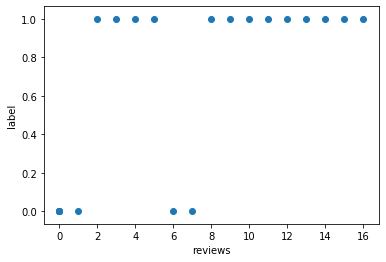

In [123]:
plt.scatter(dframe['review_num'],dframe['label_num'])
plt.xlabel('reviews')
plt.ylabel('label')

In [124]:
km = KMeans(n_clusters=2)
km.fit(dframe[['review_num','label_num']])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [125]:
y_predicted=km.labels_

In [126]:
dframe['cluster']=y_predicted
dframe.head()

,reviews,label,label_num,review_num,cluster
0,Happy very quick delivery,positive,1,4,0
1,responsible and good lock Same as above Battar...,positive,1,16,1
2,,negative,0,0,0
3,,negative,0,0,0
4,So far it s nice feeling using this mobile,positive,1,8,1


In [127]:
km.cluster_centers_

array([[ 2.54545455,  0.36363636],
       [12.        ,  1.        ]])

In [128]:
from sklearn.metrics import accuracy_score
accuracy_score(dframe['label_num'],dframe['cluster'])

0.8

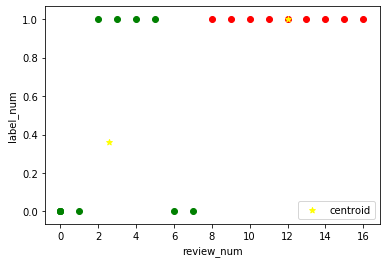

In [129]:
df1 = dframe[dframe.cluster==0]
df2 = dframe[dframe.cluster==1]
df3 = dframe[dframe.cluster==2]
plt.scatter(df1.review_num,df1['label_num'],color='green')
plt.scatter(df2.review_num,df2['label_num'],color='red')
plt.scatter(df3.review_num,df3['label_num'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='*',label='centroid')
plt.xlabel('review_num')
plt.ylabel('label_num')
plt.legend()

#### EM Algorithm

In [145]:
dframe

,reviews,label,label_num,review_num,cluster
0,Happy very quick delivery,positive,1.0,0.2500,0
1,responsible and good lock Same as above Battar...,positive,1.0,1.0000,1
2,,negative,0.0,0.0000,0
3,,negative,0.0,0.0000,0
4,So far it s nice feeling using this mobile,positive,1.0,0.5000,1
5,Great performance,positive,1.0,0.1875,0
6,nSlim and easy to access,positive,1.0,0.6875,1
7,Comfortable to hanfle,positive,1.0,0.1250,0
8,Liked the product smooth and big no lags,negative,0.0,0.4375,0
9,nice product This is my first android device ...,positive,1.0,0.7500,1


In [146]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dframe[['label_num']])
dframe['label_num'] = scaler.transform(dframe[['label_num']])

scaler.fit(dframe[['review_num']])
dframe['review_num'] = scaler.transform(dframe[['review_num']])

In [147]:
from sklearn.mixture import GaussianMixture
gm=GaussianMixture(n_components=2,covariance_type='diag')
gm.fit(dframe[['review_num','label_num']])
y_cluster_gm=gm.predict(dframe[['review_num','label_num']])
y_cluster_gm

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1],
      dtype=int32)

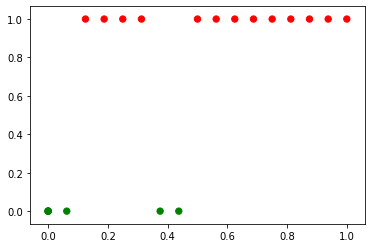

In [148]:
import numpy as np
#plt.subplot(2,2,3)
colormap=np.array(['red','green','blue'])
plt.scatter(dframe['review_num'],dframe['label_num'],c=colormap[y_cluster_gm],s=40)

In [149]:
gm.score(dframe[['review_num','label_num']],y_cluster_gm)

5.345079066687431

In [150]:
gm=GaussianMixture(n_components=2)
gm.fit(dframe[['review_num','label_num']])


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [151]:
g_predicted=gm.means_

In [152]:
dframe['cluster']=g_predicted
dframe.head()

ValueError: Length of values does not match length of index

In [131]:
print(dir(gm))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_check_initial_parameters', '_check_is_fitted', '_check_parameters', '_compute_lower_bound', '_e_step', '_estimate_log_prob', '_estimate_log_prob_resp', '_estimate_log_weights', '_estimate_weighted_log_prob', '_estimator_type', '_get_param_names', '_get_parameters', '_get_tags', '_initialize', '_initialize_parameters', '_m_step', '_n_parameters', '_print_verbose_msg_init_beg', '_print_verbose_msg_init_end', '_print_verbose_msg_iter_end', '_set_parameters', 'aic', 'bic', 'converged_', 'covariance_type', 'covar